In [2]:
%%bash
# Install GAP
pip install quippy-ase

# Install MACE
if test -d mace
then
    rm -rfv mace
fi
git clone --depth 1 --branch develop https://github.com/ACEsuit/mace.git 
pip install mace/

# Install extension to ASE
if test -d aseMolec
then
    rm -rfv aseMolec
fi
git clone --depth 1 https://github.com/imagdau/aseMolec.git
pip install aseMolec/

removed 'mace/build/lib/mace/cli/__init__.py'
removed 'mace/build/lib/mace/cli/preprocess_data.py'
removed 'mace/build/lib/mace/cli/plot_train.py'
removed 'mace/build/lib/mace/cli/create_lammps_model.py'
removed 'mace/build/lib/mace/cli/eval_configs.py'
removed 'mace/build/lib/mace/cli/active_learning_md.py'
removed 'mace/build/lib/mace/cli/run_train.py'
removed directory 'mace/build/lib/mace/cli'
removed 'mace/build/lib/mace/data/__init__.py'
removed 'mace/build/lib/mace/data/atomic_data.py'
removed 'mace/build/lib/mace/data/neighborhood.py'
removed 'mace/build/lib/mace/data/utils.py'
removed 'mace/build/lib/mace/data/hdf5_dataset.py'
removed directory 'mace/build/lib/mace/data'
removed 'mace/build/lib/mace/__version__.py'
removed 'mace/build/lib/mace/__init__.py'
removed 'mace/build/lib/mace/modules/loss.py'
removed 'mace/build/lib/mace/modules/__init__.py'
removed 'mace/build/lib/mace/modules/utils.py'
removed 'mace/build/lib/mace/modules/blocks.py'
removed 'mace/build/lib/mace/modu

Cloning into 'mace'...


Processing ./mace
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mace-torch: filename=mace_torch-0.3.5-py3-none-any.whl size=113584 sha256=b314380d8c87f03cf87e4fe8f4ae8b2787df3a1138585df3973ec9c848f203df
  Stored in directory: /tmp/pip-ephem-wheel-cache-ve93hrq4/wheels/cd/34/b9/3452a3f939c7105020a643c0db22902e503ab6b6da900cdb98
Successfully built mace-torch
  Attempting uninstall: mace-torch
    Found existing installation: mace-torch 0.3.5
    Uninstalling mace-torch-0.3.5:
      Successfully uninstalled mace-torch-0.3.5
removed 'aseMolec/build/lib/aseMolec/__init__.py'
removed 'aseMolec/build/lib/aseMolec/evalUtils.py'
removed 'aseMolec/build/lib/aseMolec/ioLammps.py'
removed 'aseMolec/

Cloning into 'aseMolec'...


Processing ./aseMolec
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for aseMolec: filename=aseMolec-1.0.0-py3-none-any.whl size=22928 sha256=8a9e7d6d2e5f49fa14047561673c3c8f81325084fc77907fb4648ca94c036076
  Stored in directory: /tmp/pip-ephem-wheel-cache-rlmg8blr/wheels/b2/8c/2f/74de589c022d356c82d3928d3d0fd4c501241ae3346e73b807
Successfully built aseMolec
  Attempting uninstall: aseMolec
    Found existing installation: aseMolec 1.0.0
    Uninstalling aseMolec-1.0.0:
      Successfully uninstalled aseMolec-1.0.0


In [ ]:
/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data

In [3]:
from ase.io import read, write

db = read('/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_xtb.xyz', ':')

#non-periodic data is handled correctly by MACE, so we do not need to change anything
write('/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_mace_train.xyz', db[:203])
write('/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_mace_test.xyz', db[203:403])

/home/insomniac/.virtualenvs/nist/lib/python3.10/site-packages/ase/io/extxyz.py:1000: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


In [5]:
!python3 ./mace/scripts/run_train.py \
    --name="model" \
    --train_file="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_xtb.xyz" \
    --valid_fraction=0.05 \
    --test_file="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/maceTests/solvent_test.xyz" \
    --E0s="isolated" \
    --energy_key="energy" \
    --forces_key="forces" \
    --model="MACE" \
    --num_interactions=2 \
    --max_ell=2 \
    --hidden_irreps="16x0e" \
    --num_cutoff_basis=5 \
    --correlation=2 \
    --r_max=3.0 \
    --batch_size=5 \
    --valid_batch_size=5 \
    --eval_interval=1 \
    --max_num_epochs=50 \
    --start_swa=15 \
    --swa_energy_weight=1000 \
    --ema \
    --ema_decay=0.99 \
    --amsgrad \
    --error_table="PerAtomRMSE" \
    --default_dtype="float32" \
    --swa \
    --device=cpu \
    --seed=1234

2024-06-23 16:33:11.832 INFO: MACE version: 0.3.5
2024-06-23 16:33:11.832 INFO: Configuration: Namespace(config=None, name='model', seed=1234, log_dir='logs', model_dir='.', checkpoints_dir='checkpoints', results_dir='results', downloads_dir='downloads', device='cpu', default_dtype='float32', distributed=False, log_level='INFO', error_table='PerAtomRMSE', model='MACE', r_max=3.0, radial_type='bessel', num_radial_basis=8, num_cutoff_basis=5, pair_repulsion=False, distance_transform='None', interaction='RealAgnosticResidualInteractionBlock', interaction_first='RealAgnosticResidualInteractionBlock', max_ell=2, correlation=2, num_interactions=2, MLP_irreps='16x0e', radial_MLP='[64, 64, 64]', hidden_irreps='16x0e', num_channels=None, max_L=None, gate='silu', scaling='rms_forces_scaling', avg_num_neighbors=1, compute_avg_num_neighbors=True, compute_stress=False, compute_forces=True, train_file='/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_xtb.xyz', valid_file=None, val

In [6]:
#evaluate the train set

!python3 ./mace/scripts/eval_configs.py \
    --configs="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_mace_train.xyz" \
    --model="model_swa.model" \
    --output="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/maceTests/solvent_train.xyz" \
    --default_dtype="float32" \
    --info_prefix=""

#evaluate the test set
!python3 ./mace/scripts/eval_configs.py \
    --configs="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_mace_test.xyz" \
    --model="model_swa.model" \
    --output="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/maceTests/solvent_test.xyz" \
    --default_dtype="float32" \
    --info_prefix=""

#evaluate the volume scan
!python3 ./mace/scripts/eval_configs.py \
    --configs="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/volumeScan.xyz" \
    --model="model_swa.model" \
    --output="/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/maceTests/volumeScan.xyz" \
    --default_dtype="float32" \
    --info_prefix=""

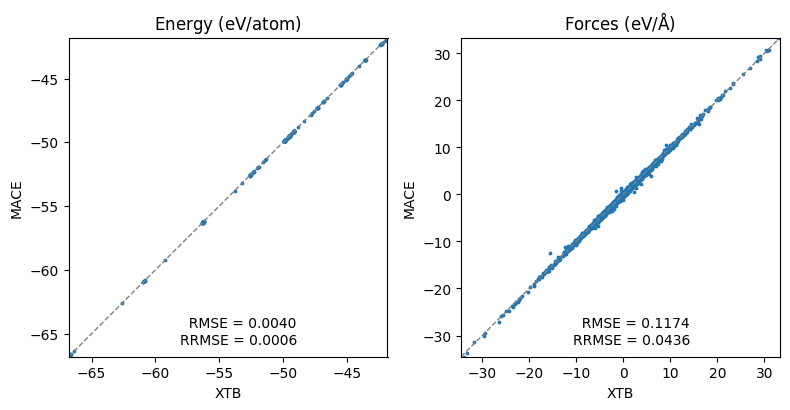

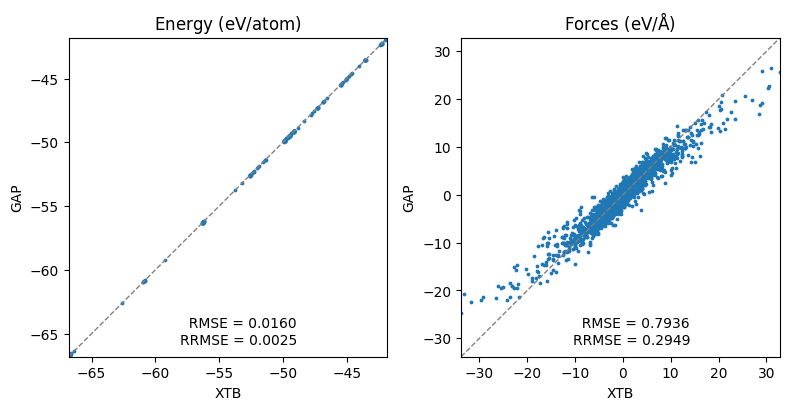

In [8]:
from aseMolec import pltProps as pp
from ase.io import read
import matplotlib.pyplot as plt
from aseMolec import extAtoms as ea 
import numpy as np

def plot_RMSEs(db1, db2, labs):
    plt.figure(figsize=(8,4), dpi=100)
    plt.subplot(1,2,1)
    pp.plot_prop(ea.get_prop(db1, 'info', 'energy', True).flatten(), \
                 ea.get_prop(db2, 'info', 'energy', True).flatten(), \
                 title=r'Energy $(\rm eV/atom)$ ', labs=labs, rel=True)
    plt.subplot(1,2,2)
    pp.plot_prop(np.concatenate(ea.get_prop(db1, 'arrays', 'forces')).flatten(), \
                 np.concatenate(ea.get_prop(db2, 'arrays', 'forces')).flatten(), \
                 title=r'Forces $\rm (eV/\AA)$ ', labs=labs, rel=True)
    plt.tight_layout()
    return

plot_RMSEs(read('/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_mace_test.xyz', ':'), read('/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/maceTests/solvent_test.xyz', ':'), labs=['XTB', 'MACE'])
plot_RMSEs(read('/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/data/solvent_test.xyz', ':'), read('/home/insomniac/Desktop/MACE/mace-tutorials/mace-users/gapTests/solvent_test.xyz', ':'), labs=['XTB', 'GAP'])